# Deep Learning Models
Class used libraries and different databases for:
1. Image Classification (CIFAR-10)
2. Text Classification (IMDb Reviews)
3. Regression (California Housing)
(models with layers?)

## 1. Image Classification - CIFAR-10

In [4]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Model
model_img = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_img.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_img.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Evaluation
y_pred = np.argmax(model_img.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3586 - loss: 1.7417 - val_accuracy: 0.5476 - val_loss: 1.2688
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5890 - loss: 1.1687 - val_accuracy: 0.6127 - val_loss: 1.1169
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6509 - loss: 1.0082 - val_accuracy: 0.6519 - val_loss: 1.0156
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6818 - loss: 0.9130 - val_accuracy: 0.6346 - val_loss: 1.0520
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7109 - loss: 0.8348 - val_accuracy: 0.6664 - val_loss: 0.9705
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1000
           1       0.79      0.80      0.79      1000
           2       0.55      0.54      0.54      1000
           3       0.52      0.39      0.44      1000
           4       0.57      0.69     

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9024\3536151274.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


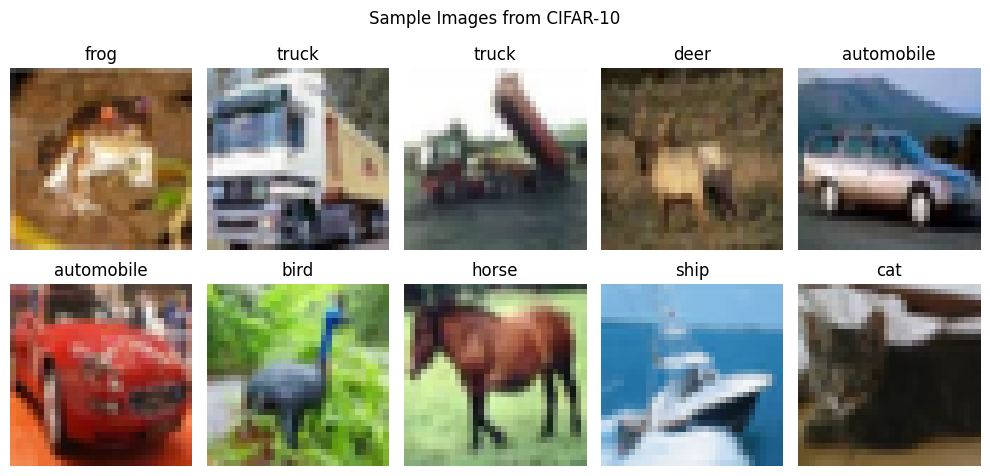

In [5]:

# Explore CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.suptitle("Sample Images from CIFAR-10")
plt.tight_layout()
plt.show()


In [6]:

# Save
with open("/mnt/data/image_model.pkl", "wb") as f:
    pickle.dump(model_img, f)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/image_model.pkl'

## 2. Text Classification - IMDb Reviews

In [7]:

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load data
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Model
model_text = Sequential([
    Embedding(num_words, 32, input_length=200),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_text.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_text.fit(x_train, y_train, epochs=3, validation_split=0.2)

# Evaluation
y_pred = (model_text.predict(x_test) > 0.5).astype('int32')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Epoch 1/3


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7111 - loss: 0.5342 - val_accuracy: 0.8540 - val_loss: 0.3398
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.9019 - loss: 0.2543 - val_accuracy: 0.8506 - val_loss: 0.3784
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9365 - loss: 0.1814 - val_accuracy: 0.8566 - val_loss: 0.3753
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     12500
           1       0.92      0.75      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.86      0.84      0.84     25000
weighted avg       0.86      0.84      0.84     25000

[[11703   797]
 [ 3106  9394]]


In [8]:

# Explore IMDb dataset
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

print("Sample decoded review (training sample 0):")
print(decode_review(x_train[0]))
print("Label:", "Positive" if y_train[0] == 1 else "Negative")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Sample decoded review (training sample 0):
and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so 

In [ ]:
# Save
with open("/mnt/data/text_model.pkl", "wb") as f:
    pickle.dump(model_text, f)


## 3. Regression - California Housing

In [9]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load data
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model_reg = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model_reg.compile(optimizer='adam', loss='mse')
model_reg.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluation
y_pred = model_reg.predict(X_test).flatten()
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))




Epoch 1/10


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5100 - val_loss: 0.4769
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4286 - val_loss: 0.4090
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3549 - val_loss: 0.3957
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3564 - val_loss: 0.3651
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3359 - val_loss: 0.3533
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3115 - val_loss: 0.3563
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3355 - val_loss: 0.3338
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3254 - val_loss: 0.3216
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3060 - val_loss: 0.3279
Epoch 10/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2919 - val_loss: 0.3361
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
MAE: 0.38041597481162276
MSE: 0.3092163113427202
R2 Score: 0.7640306831857837


First 5 rows of the California Housing dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


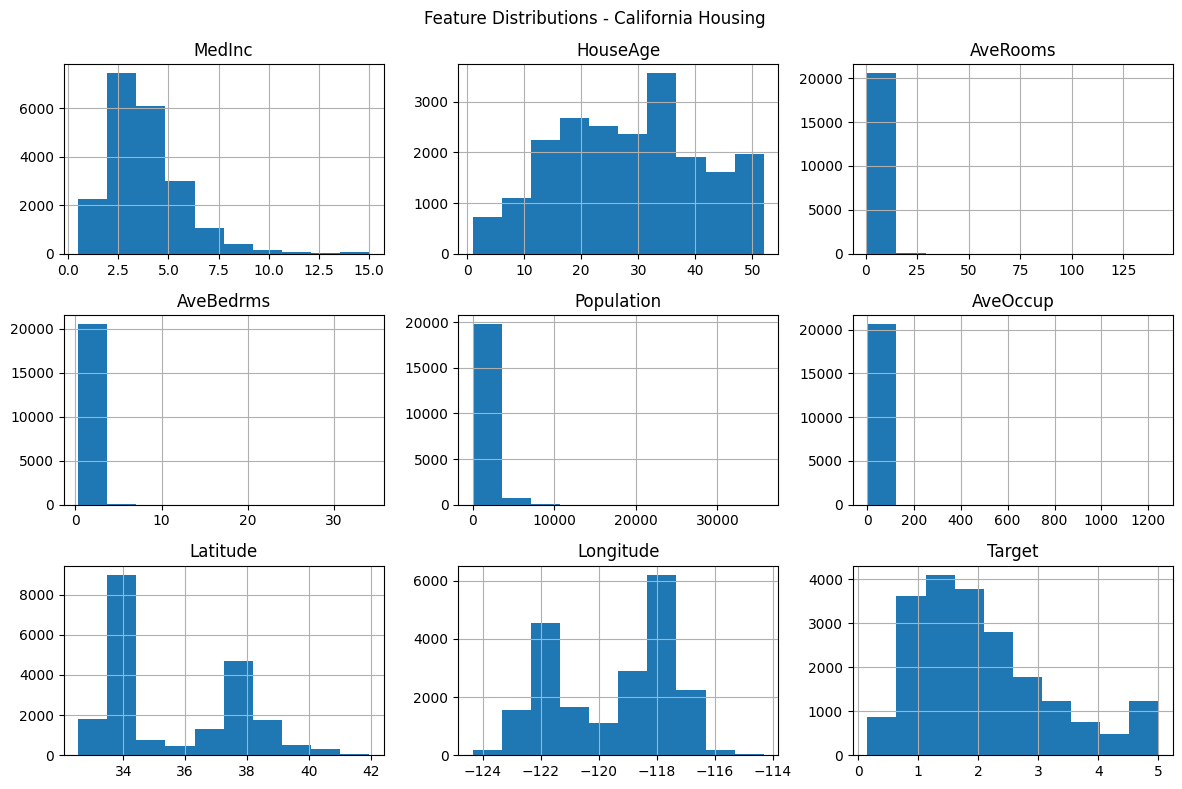

In [10]:

# Explore California Housing dataset
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
print("First 5 rows of the California Housing dataset:")
print(df.head())
df.hist(figsize=(12, 8))
plt.suptitle("Feature Distributions - California Housing")
plt.tight_layout()
plt.show()


In [ ]:
# Save
with open("/mnt/data/regression_model.pkl", "wb") as f:
    pickle.dump(model_reg, f)